<a href="https://colab.research.google.com/github/praneetvoruganti/didactic-octo-chainsaw/blob/master/mtcars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Performing the t-test, ANOVA(f_oneway test) and chi-squared test on mtcars**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()                                    #upload dataset from local storage

Saving mtcars.csv to mtcars (2).csv


In [0]:
import io
mtcars = pd.read_csv(io.StringIO(uploaded['mtcars.csv'].decode('utf-8')))           #import dataframe

In [5]:
mtcars.head()                   #first 5 tuples

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [6]:
mtcars.shape                                   # rows x columns 

(32, 12)

In [7]:
mtcars.dtypes

model     object
mpg      float64
cyl        int64
disp     float64
hp         int64
drat     float64
wt       float64
qsec     float64
vs         int64
am         int64
gear       int64
carb       int64
dtype: object

In [8]:
mtcars.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000


In [9]:
mtcars.isnull().values.any()                           #check for null values in the dataframe

False

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5469626e10>,
      dtype=object)

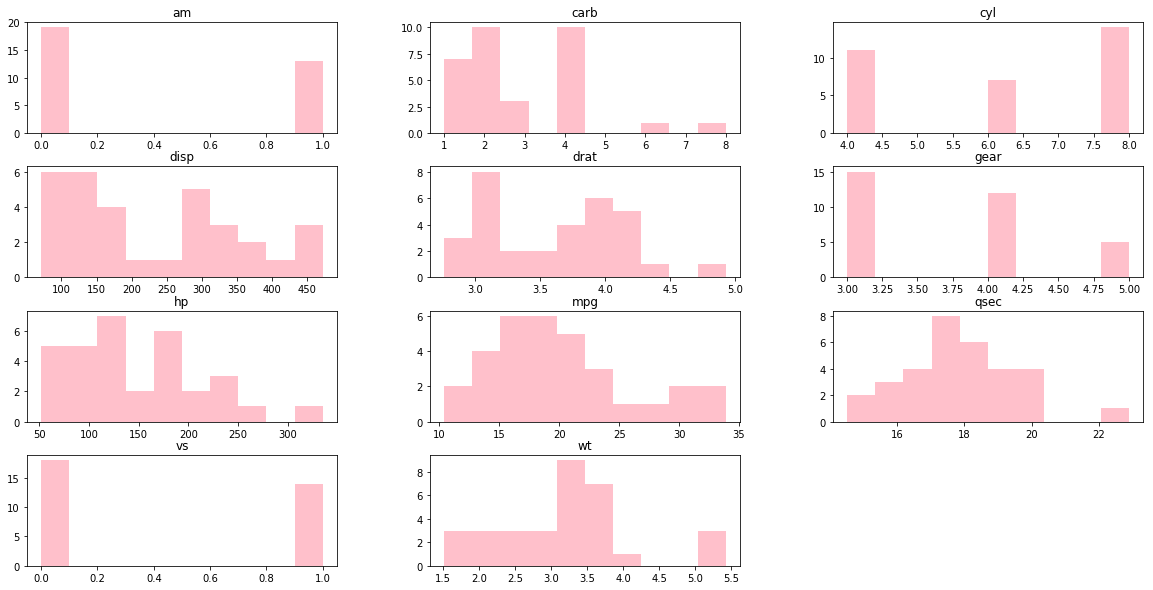

In [10]:
#univariate Analysis - Histogram
mtcars.hist(grid=False, figsize=(20,10), color='pink')

In [0]:
mtcars1=mtcars.iloc[:,1:]          #The iloc indexer for Pandas Dataframe is used for "integer-location" based indexing / selection by position.

In [12]:
mtcars1.head()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


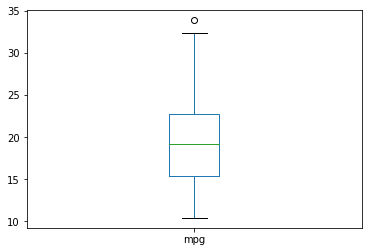

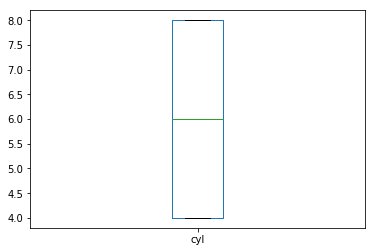

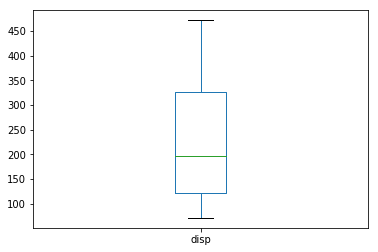

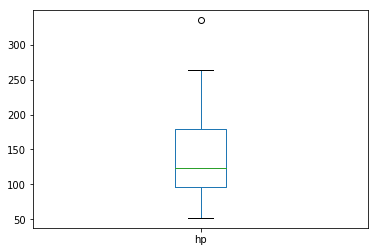

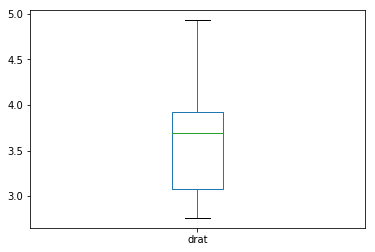

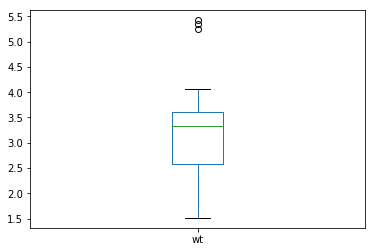

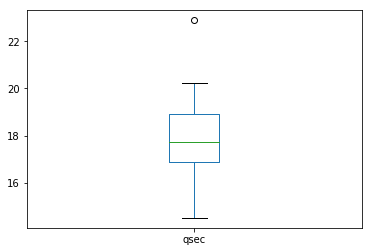

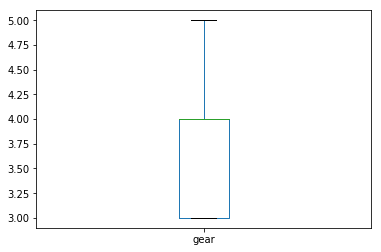

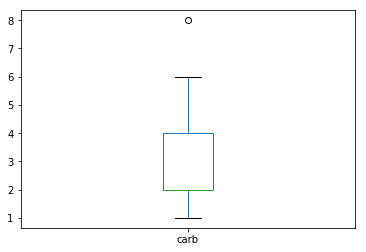

In [13]:
#boxplot - for all features except model, vs and am
for item in mtcars1:
    if (item == 'model' or item == 'vs' or item == 'am'):
        continue
    else:
        plt.figure()
        mtcars1.boxplot(column=[item], grid=False)
        

In [0]:
import seaborn as sns

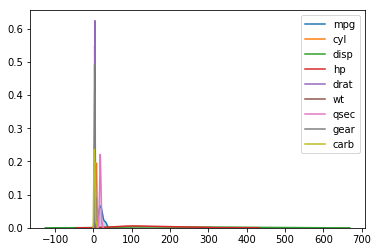

In [15]:
#density plot - for all features except model, vs and am
for item in mtcars1:
    if (item == 'model' or item == 'vs' or item == 'am'):
        continue
    else:
#       plt.figure()
        sns.kdeplot(mtcars1[item], shade=True)


In [16]:
# value counts and cross tabulations
pd.value_counts(mtcars1.am)

0    19
1    13
Name: am, dtype: int64

In [17]:
pd.value_counts(mtcars1.gear)

3    15
4    12
5     5
Name: gear, dtype: int64

In [18]:
pd.crosstab(mtcars1.am,mtcars1.gear)       # am - gear    

gear,3,4,5
am,,,
0,15,4,0
1,0,8,5


In [19]:
pd.crosstab(mtcars1.carb, mtcars1.gear)   # carb - gear 

gear,3,4,5
carb,,,
1,3,4,0
2,4,4,2
3,3,0,0
4,5,4,1
6,0,0,1
8,0,0,1


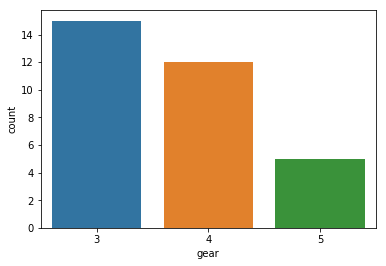

In [20]:
#value_counts plot for features
mtcars1['gear'].value_counts()
sns.countplot(mtcars1['gear'])

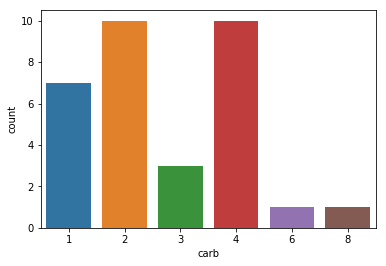

In [21]:
mtcars1['carb'].value_counts()
sns.countplot(mtcars1['carb'])

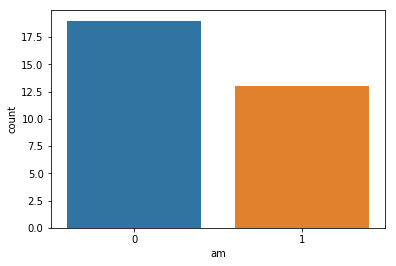

In [22]:
mtcars1['am'].value_counts()
sns.countplot(mtcars1['am'])

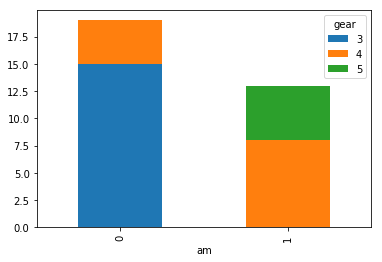

In [23]:
#plots using cross-tabulated data
pd.crosstab(mtcars.am,mtcars.gear).plot(kind='bar',stacked='True')

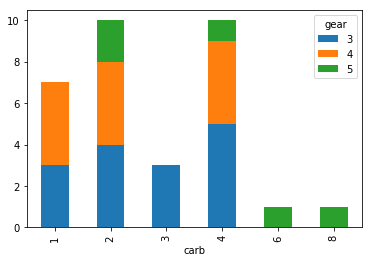

In [24]:
pd.crosstab(mtcars.carb,mtcars.gear).plot(kind='bar',stacked='True')

In [25]:
#Bivariate analysis
mtcars1.corr()                              #correlation between the features

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.852162,-0.847551,-0.776168,0.681172,-0.867659,0.418684,0.664039,0.599832,0.480285,-0.550925
cyl,-0.852162,1.000000,0.902033,0.832447,-0.699938,0.782496,-0.591242,-0.810812,-0.522607,-0.492687,0.526988
disp,-0.847551,0.902033,1.000000,0.790949,-0.710214,0.887980,-0.433698,-0.710416,-0.591227,-0.555569,0.394977
hp,-0.776168,0.832447,0.790949,1.000000,-0.448759,0.658748,-0.708223,-0.723097,-0.243204,-0.125704,0.749812
drat,0.681172,-0.699938,-0.710214,-0.448759,1.000000,-0.712441,0.091205,0.440278,0.712711,0.699610,-0.090790
wt,-0.867659,0.782496,0.887980,0.658748,-0.712441,1.000000,-0.174716,-0.554916,-0.692495,-0.583287,0.427606
qsec,0.418684,-0.591242,-0.433698,-0.708223,0.091205,-0.174716,1.000000,0.744535,-0.229861,-0.212682,-0.656249
vs,0.664039,-0.810812,-0.710416,-0.723097,0.440278,-0.554916,0.744535,1.000000,0.168345,0.206023,-0.569607
am,0.599832,-0.522607,-0.591227,-0.243204,0.712711,-0.692495,-0.229861,0.168345,1.000000,0.794059,0.057534
gear,0.480285,-0.492687,-0.555569,-0.125704,0.699610,-0.583287,-0.212682,0.206023,0.794059,1.000000,0.274073


In [26]:
mtcars1.cov()                      #covariance

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,36.324103,-9.172379,-633.097208,-320.732056,2.195064,-5.116685,4.509149,2.017137,1.803931,2.135685,-5.363105
cyl,-9.172379,3.189516,199.660282,101.931452,-0.668367,1.367371,-1.886855,-0.729839,-0.465726,-0.649194,1.520161
disp,-633.097208,199.660282,15360.799829,6721.158669,-47.064019,107.684204,-96.051681,-44.377621,-36.564012,-50.802621,79.068750
hp,-320.732056,101.931452,6721.158669,4700.866935,-16.451109,44.192661,-86.770081,-24.987903,-8.320565,-6.358871,83.036290
drat,2.195064,-0.668367,-47.064019,-16.451109,0.285881,-0.372721,0.087141,0.118649,0.190151,0.275988,-0.078407
wt,-5.116685,1.367371,107.684204,44.192661,-0.372721,0.957379,-0.305482,-0.273661,-0.338105,-0.421081,0.675790
qsec,4.509149,-1.886855,-96.051681,-86.770081,0.087141,-0.305482,3.193166,0.670565,-0.204960,-0.280403,-1.894113
vs,2.017137,-0.729839,-44.377621,-24.987903,0.118649,-0.273661,0.670565,0.254032,0.042339,0.076613,-0.463710
am,1.803931,-0.465726,-36.564012,-8.320565,0.190151,-0.338105,-0.204960,0.042339,0.248992,0.292339,0.046371
gear,2.135685,-0.649194,-50.802621,-6.358871,0.275988,-0.421081,-0.280403,0.076613,0.292339,0.544355,0.326613


(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

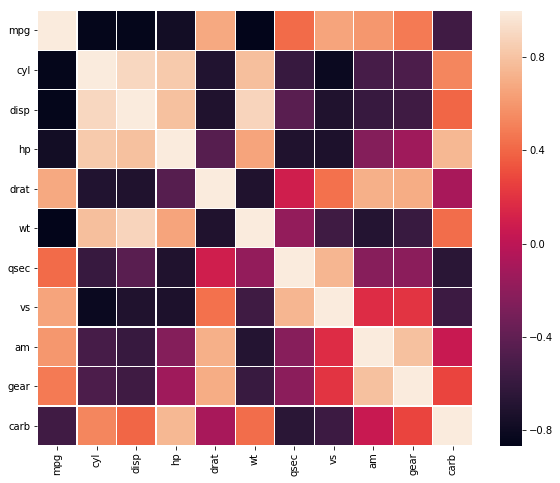

In [27]:
#plot heatmap
plt.figure(figsize=(10,8))
sns.heatmap(mtcars1.corr(), square=True, linewidths=0.2)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5]),
 <a list of 11 Text yticklabel objects>)

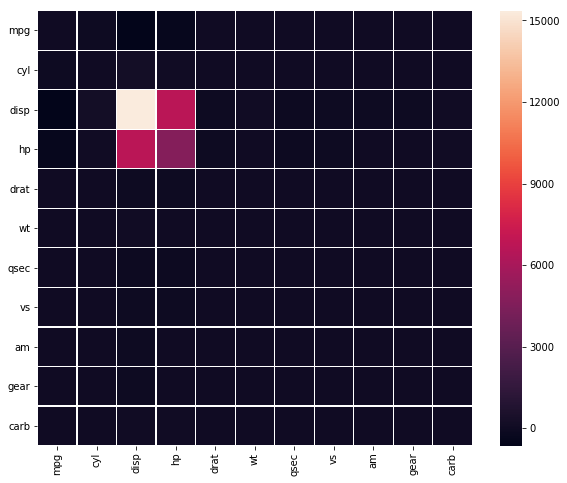

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(mtcars1.cov(), square=True, linewidths=0.2)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

<Figure size 1440x720 with 0 Axes>

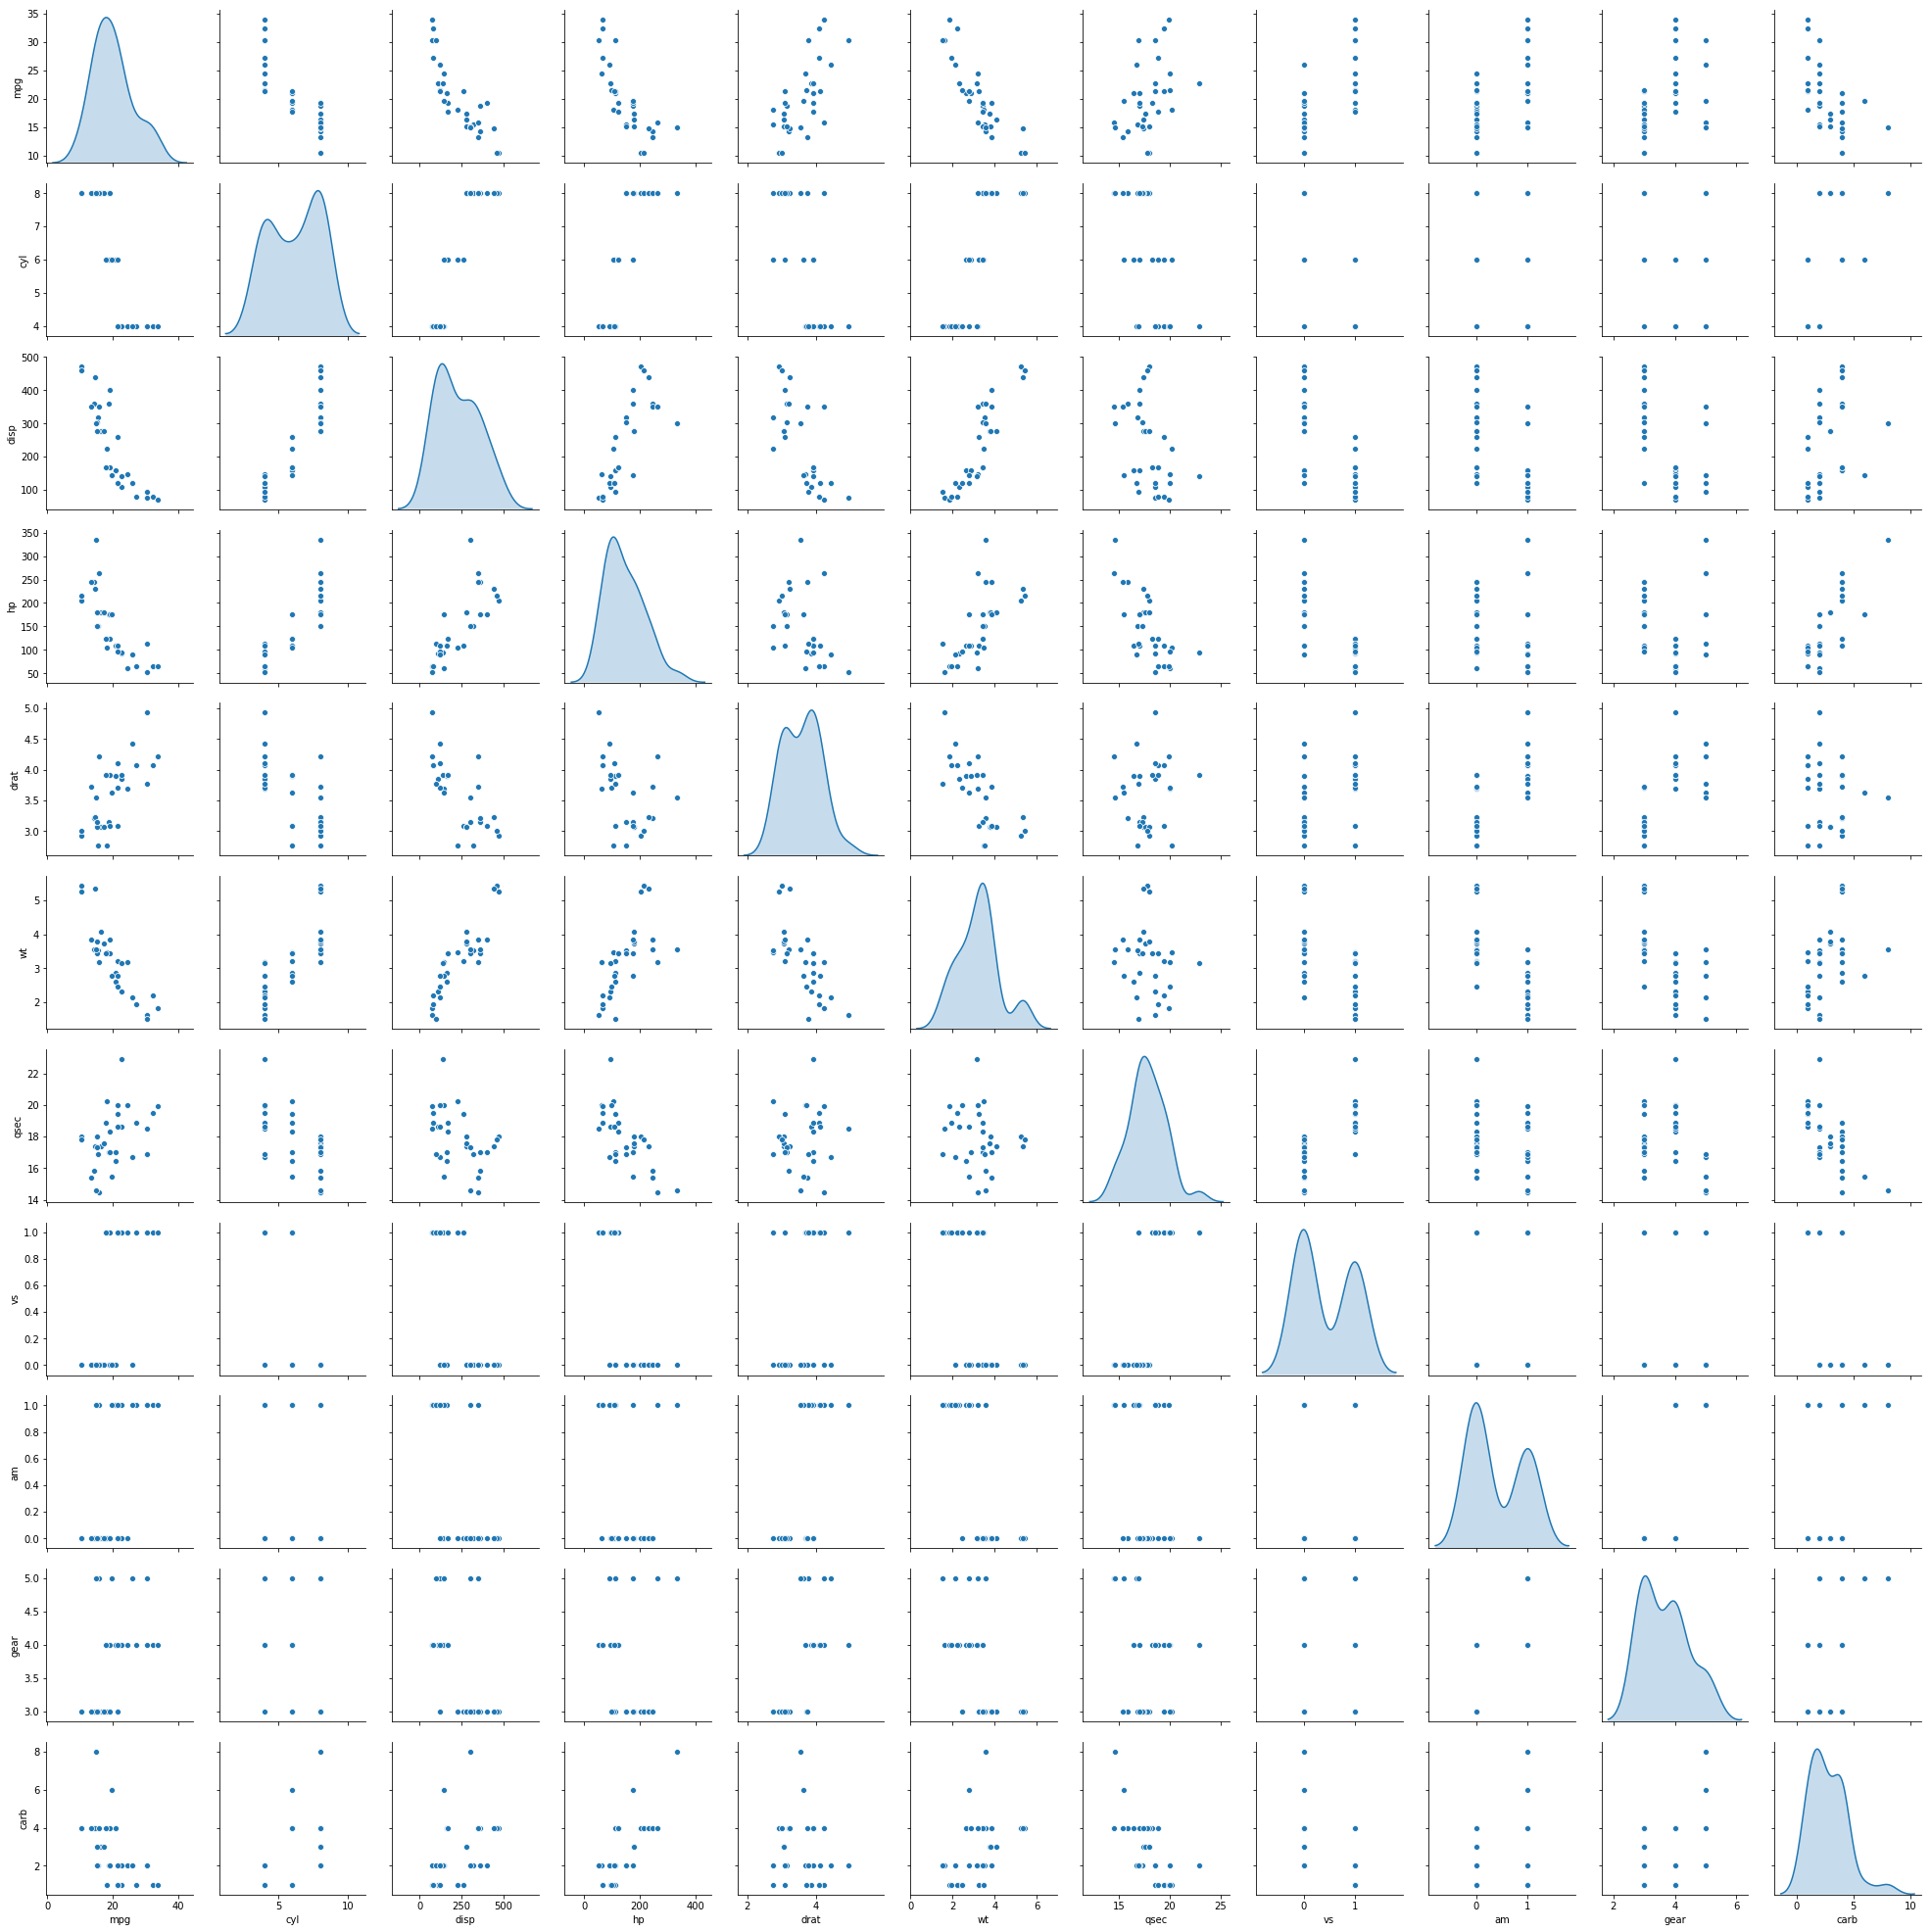

In [29]:
#pairplot for the entire data
plt.figure(figsize=(20,10))
sns.pairplot(mtcars1, diag_kind='kde')

In [0]:
#adding new feature
AutoType=[]

for row in mtcars.am:
    if row==0:
        AutoType.append("Automatic")
    else:
        AutoType.append("Manual")

mtcars['AutoType']=AutoType

In [31]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,AutoType
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Manual
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Manual
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Manual
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Automatic
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Automatic


In [0]:
MileageType=[]
for row in mtcars.mpg:
    if row >= 22.80:
        MileageType.append('High')
    elif row >= 19.20:
        MileageType.append('Medium')
    else :
        MileageType.append('Low')
mtcars['MileageType']=MileageType

In [33]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,AutoType,MileageType
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Manual,Medium
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Manual,Medium
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Manual,High
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Automatic,Medium
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Automatic,Low


In [0]:
WtType = []
for row in mtcars.wt:
    if row > 3.6:
        WtType.append('Heavy')
    elif row > 3.3:
        WtType.append('Medium')
    else:
        WtType.append('Light')
mtcars['WtType']=WtType

In [35]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,AutoType,MileageType,WtType
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,Manual,Medium,Light
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,Manual,Medium,Light
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,Manual,High,Light
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,Automatic,Medium,Light
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,Automatic,Low,Medium


In [0]:
#performing ttest, f-test(ANOVA) and chi-squared test

A **hypothesis** is a speculation or theory based on insufficient evidence that lends itself to further testing and experimentation. With further testing, a hypothesis can usually be proven true or false.

A **null hypothesis** is a hypothesis that says there is no statistical significance between the two variables in the hypothesis.

An **alternative hypothesis** simply is the inverse, or opposite, of the null hypothesis.

In [0]:
from scipy import stats as st

In [0]:
auto = mtcars[mtcars.AutoType=='Automatic']
manual = mtcars[mtcars.AutoType=='Manual']

In [39]:
st.ttest_ind(auto.mpg,manual.mpg)                     # t-test

Ttest_indResult(statistic=-4.106126983100689, pvalue=0.0002850207439350686)

In [0]:
# p<0.05 => NULL hypothesis is rejected / There is no significant difference in the means / Statistically Insignificant

In [0]:
three=mtcars[mtcars.gear==3]
four=mtcars[mtcars.gear==4]
five=mtcars[mtcars.gear==5]

In [42]:
st.f_oneway(three.mpg,four.mpg,five.mpg)          # f-test

F_onewayResult(statistic=10.900719688660931, pvalue=0.00029482799285719474)

In [0]:
# p<0.05 => NULL hypothesis is rejected / There is no significant difference in the means / Statistically Insignificant 

In [44]:
pd.crosstab(mtcars.MileageType,mtcars.WtType)

WtType,Heavy,Light,Medium
MileageType,,,
High,0,9,0
Low,7,1,7
Medium,1,6,1


In [45]:
st.chi2_contingency(pd.crosstab(mtcars.MileageType,mtcars.WtType))              #chi-squared test

(22.266666666666666, 0.0001773515126930397, 4, array([[2.25, 4.5 , 2.25],
        [3.75, 7.5 , 3.75],
        [2.  , 4.  , 2.  ]]))

In [0]:
# p<0.05 => NULL hypothesis is rejected / Means are equal / Statistically Insignificant

In [0]:
mtcars.drop(["AutoType","MileageType","WtType"], axis=1, inplace=True)

In [0]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
mtcars['Class']= le.fit_transform(mtcars['model'])

In [55]:
mtcars.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Class
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,17
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4,18
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1,4
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1,12
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2,13


In [0]:
X = mtcars.iloc[:,1:12]
y = mtcars.iloc[:,-1]

In [58]:
#Decision tree to find the feature importance
from sklearn.tree import DecisionTreeClassifier
tree= DecisionTreeClassifier(criterion='entropy', random_state=1)
tree.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [59]:
imp= pd.DataFrame(index=X.columns, data=tree.feature_importances_, columns=['Imp'] )
imp.sort_values(by='Imp', ascending=False)

,Imp
disp,0.3125
qsec,0.3000
mpg,0.1000
drat,0.0875
cyl,0.0625
hp,0.0500
wt,0.0500
am,0.0250
carb,0.0125
vs,0.0000


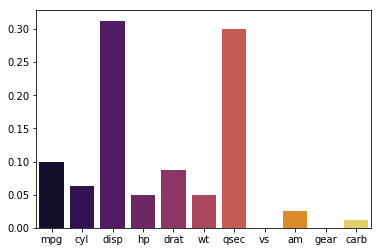

In [61]:
# Importance - barplot
sns.barplot(x=imp.index.tolist(), y=imp.values.ravel(), palette='inferno')

In [0]:
#consider features with high importance

In [0]:
X1 = mtcars[['disp','qsec']]
Y1 = mtcars.iloc[:,0]

In [0]:
#K means clustering
from sklearn.cluster import KMeans
dist=[]
for i in range(1,7):
    kmeans= KMeans(n_clusters=i, init='k-means++', random_state=1)
    kmeans.fit(X1)
    dist.append(kmeans.inertia_)

In [77]:
print(dist)

[476283.7828375, 96077.07587058823, 42498.87900625, 26238.911124494945, 12601.785667817458, 8683.179623333335]


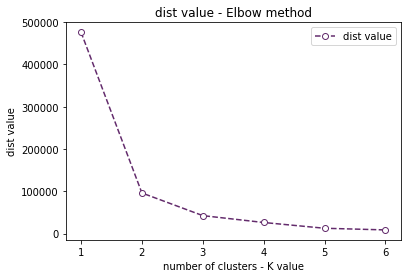

In [86]:
plt.plot(range(1,7), dist, linestyle='--', marker='o', label='dist value', markerfacecolor= 'white', color='#632B6C')
plt.title('dist value - Elbow method')
plt.xlabel('number of clusters - K value')
plt.ylabel('dist value')
plt.legend()
plt.show()

In [88]:
kmeans= KMeans(n_clusters=2, random_state=1)       # number of clusters = 2
kmeans.fit(X1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [89]:
kmeans.predict(X1)

array([0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int32)

In [90]:
kmeans.cluster_centers_

array([[128.33529412,  18.64176471],
       [346.76      ,  16.95      ]])

In [92]:
mtcars['cluster']=kmeans.predict(X1)
mtcars.sort_values(by='cluster').head()


,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,Class,cluster
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,17,0
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.50,0,1,5,6,7,0
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2,15,0
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2,27,0
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1,9,0


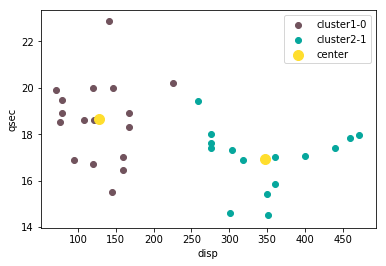

In [98]:
#plotting clusters
plt.scatter(mtcars.loc[mtcars['cluster']==0]['disp'], mtcars.loc[mtcars['cluster']==0]['qsec'], color='#71535D', label='cluster1-0')
plt.scatter(mtcars.loc[mtcars['cluster']==1]['disp'], mtcars.loc[mtcars['cluster']==1]['qsec'], color='#06A79D', label='cluster2-1')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, color='#FFDE2D', label='center')
plt.xlabel('disp')
plt.ylabel('qsec')
plt.legend()
plt.show()